In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from  matplotlib.ticker import PercentFormatter
import seaborn as sns
from IPython.display import Image, display

In [2]:
#Set Option
pd.set_option('max_colwidth', -1)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', -1)
sns.set_theme()

<ipython-input-2-27eeedc1b71f>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [3]:
df = pd.read_csv('data/Worldometer_4_21.csv', index_col = 0)

In [4]:
df.head(3)

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
#,,,,,,,,,,,,,,,,,
1,China,90541,21.0,4636,NaN,85600,27.0,305,6.0,63.0,3.0,160000000.0,111163.0,1439323776,15897.0,310467.0,9.0
2,USA,32602051,65057.0,583330,876.0,25177434,73818.0,6841287,10009.0,98032.0,1754.0,433439646.0,1303328.0,332563810,10.0,570.0,1.0
3,India,15924806,315802.0,184672,2102.0,13449406,179543.0,2290728,8944.0,11449.0,133.0,271053392.0,194876.0,1390901395,87.0,7532.0,5.0


Xóa 3 cột cuối cột 

In [5]:
df = df.drop(columns=['1 Caseevery X ppl','1 Deathevery X ppl','1 Testevery X ppl'])

Xóa 2 quốc gia có dân số bị trống

In [6]:
df[df['Population'] == ' ']

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
#,,,,,,,,,,,,,,
195,Diamond Princess,712,NaN,13,NaN,699,NaN,0,NaN,NaN,NaN,NaN,NaN,
217,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,NaN,NaN,NaN,


In [7]:
df = df[df['TotalDeaths'] != ' ']

In [8]:
df = df[df['Population'] != ' ']
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
#,,,,,,,,,,,,,,
1,China,90541,21.0,4636,NaN,85600,27.0,305,6.0,63.0,3.0,160000000.0,111163.0,1439323776
2,USA,32602051,65057.0,583330,876.0,25177434,73818.0,6841287,10009.0,98032.0,1754.0,433439646.0,1303328.0,332563810
3,India,15924806,315802.0,184672,2102.0,13449406,179543.0,2290728,8944.0,11449.0,133.0,271053392.0,194876.0,1390901395
4,Brazil,14122795,71910.0,381687,3157.0,12646132,84443.0,1094976,8318.0,66064.0,1785.0,28600000.0,133786.0,213774168
5,France,5374288,34968.0,101881,313.0,4218607,37226.0,1053800,5959.0,82188.0,1558.0,72936321.0,1115408.0,65389827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Grenada,157,NaN,1,NaN,154,NaN,2,NaN,1390.0,9.0,25623.0,226867.0,112943
206,Fiji,78,1.0,2,NaN,65,NaN,11,NaN,87.0,2.0,43487.0,48230.0,901667
214,Montserrat,20,NaN,1,NaN,19,NaN,0,NaN,4005.0,200.0,1313.0,262915.0,4994


In [9]:
df[['TotalDeaths','Population']] = df[['TotalDeaths','Population']].astype('int')

In [10]:
df.select_dtypes(exclude='object')

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
#,,,,,,,,,,,,,
1,90541,21.0,4636,NaN,85600,27.0,305,6.0,63.0,3.0,160000000.0,111163.0,1439323776
2,32602051,65057.0,583330,876.0,25177434,73818.0,6841287,10009.0,98032.0,1754.0,433439646.0,1303328.0,332563810
3,15924806,315802.0,184672,2102.0,13449406,179543.0,2290728,8944.0,11449.0,133.0,271053392.0,194876.0,1390901395
4,14122795,71910.0,381687,3157.0,12646132,84443.0,1094976,8318.0,66064.0,1785.0,28600000.0,133786.0,213774168
5,5374288,34968.0,101881,313.0,4218607,37226.0,1053800,5959.0,82188.0,1558.0,72936321.0,1115408.0,65389827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,157,NaN,1,NaN,154,NaN,2,NaN,1390.0,9.0,25623.0,226867.0,112943
206,78,1.0,2,NaN,65,NaN,11,NaN,87.0,2.0,43487.0,48230.0,901667
214,20,NaN,1,NaN,19,NaN,0,NaN,4005.0,200.0,1313.0,262915.0,4994


In [11]:
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25)
def median(df):
    return df.quantile(0.5)
def upper_quartile(df):
    return df.quantile(0.75)

In [26]:
numeric_df = df.select_dtypes(exclude='object')
numeric_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max]).round(1)

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
min,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,8.0,0.3,0.0,0.0,4.994000e+03
lower_quartile,9216.0,8.0,97.0,0.0,5248.0,5.0,383.0,0.0,2173.0,33.0,119155.0,47012.0,1.214425e+06
median,58865.0,160.0,772.0,3.0,46000.0,107.0,4899.0,23.0,17775.0,236.0,937519.0,226867.0,7.545862e+06
upper_quartile,299038.0,1458.0,6095.0,25.0,269965.0,1187.0,31004.0,240.0,58783.0,820.0,5009274.0,660504.0,2.707341e+07
max,32602051.0,315802.0,583330.0,3157.0,25177434.0,179543.0,6841287.0,10009.0,166962.0,2791.0,433439646.0,6724757.0,1.439324e+09


In [24]:
df.fillna(0,inplace=True)
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
#,,,,,,,,,,,,,,
1,China,90541,21.0,4636,0.0,85600,27.0,305,6.0,63.0,3.0,160000000.0,111163.0,1439323776
2,USA,32602051,65057.0,583330,876.0,25177434,73818.0,6841287,10009.0,98032.0,1754.0,433439646.0,1303328.0,332563810
3,India,15924806,315802.0,184672,2102.0,13449406,179543.0,2290728,8944.0,11449.0,133.0,271053392.0,194876.0,1390901395
4,Brazil,14122795,71910.0,381687,3157.0,12646132,84443.0,1094976,8318.0,66064.0,1785.0,28600000.0,133786.0,213774168
5,France,5374288,34968.0,101881,313.0,4218607,37226.0,1053800,5959.0,82188.0,1558.0,72936321.0,1115408.0,65389827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Grenada,157,0.0,1,0.0,154,0.0,2,0.0,1390.0,9.0,25623.0,226867.0,112943
206,Fiji,78,1.0,2,0.0,65,0.0,11,0.0,87.0,2.0,43487.0,48230.0,901667
214,Montserrat,20,0.0,1,0.0,19,0.0,0,0.0,4005.0,200.0,1313.0,262915.0,4994


In [15]:
cols = ['TotalCases','NewCases', 'TotalDeaths', 'NewDeaths','TotalRecovered']

/home/nguyenban/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


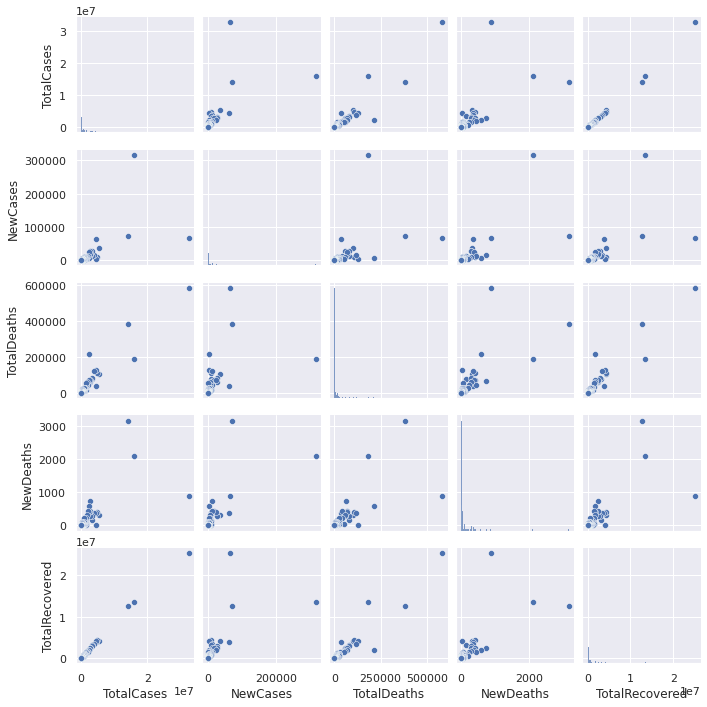

In [16]:
sns.pairplot(df[cols], size=2.0)

In [17]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 218
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country,Other     205 non-null    object 
 1   TotalCases        205 non-null    int64  
 2   NewCases          179 non-null    float64
 3   TotalDeaths       205 non-null    int64  
 4   NewDeaths         123 non-null    float64
 5   TotalRecovered    205 non-null    int64  
 6   NewRecovered      159 non-null    float64
 7   ActiveCases       205 non-null    int64  
 8   Serious,Critical  148 non-null    float64
 9   Tot Cases/1M pop  205 non-null    float64
 10  Deaths/1M pop     205 non-null    float64
 11  TotalTests        200 non-null    float64
 12  Tests/1M pop      200 non-null    float64
 13  Population        205 non-null    int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 24.0+ KB


In [18]:
df.select_dtypes(exclude='object').iloc[:,range(0,7)].values.shape

(205, 7)

In [19]:
# cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
ttt = df.select_dtypes(exclude='object').copy()
ttt = ttt.fillna(0).values
X_std = stdsc.fit_transform(ttt)

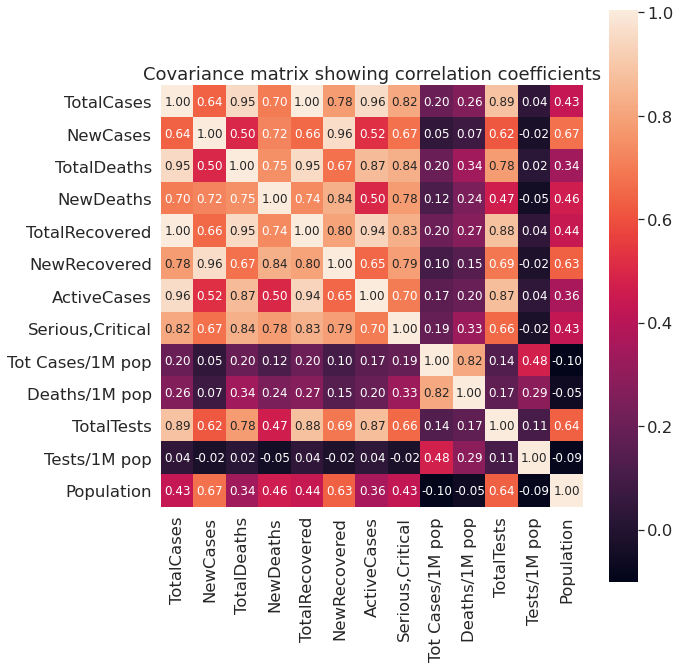

In [20]:
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=df.select_dtypes(exclude='object').columns,
                 xticklabels=df.select_dtypes(exclude='object').columns)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

- Choose 3 features that correlates strongly with each other.
- Choose 6 features and cross visualization 


- BAr chart
- Grouped BAr Chart
- Scatter 
- Heat map
- Area
- Line
- Stack Bar

In [3]:
cs_df = pd.read_csv('data/Worldometer_4_21.csv')
cs_df.head(30)


,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
0,1,China,90541,21.0,4636,NaN,85600,27.0,305,6.0,63.0,3.0,160000000.0,111163.0,1439323776,15897.0,310467.0,9.0
1,2,USA,32602051,65057.0,583330,876.0,25177434,73818.0,6841287,10009.0,98032.0,1754.0,433439646.0,1303328.0,332563810,10.0,570.0,1.0
2,3,India,15924806,315802.0,184672,2102.0,13449406,179543.0,2290728,8944.0,11449.0,133.0,271053392.0,194876.0,1390901395,87.0,7532.0,5.0
3,4,Brazil,14122795,71910.0,381687,3157.0,12646132,84443.0,1094976,8318.0,66064.0,1785.0,28600000.0,133786.0,213774168,15.0,560.0,7.0
4,5,France,5374288,34968.0,101881,313.0,4218607,37226.0,1053800,5959.0,82188.0,1558.0,72936321.0,1115408.0,65389827,12.0,642.0,1.0
5,6,Russia,4727125,8271.0,106706,399.0,4352873,9644.0,267546,2300.0,32381.0,731.0,126500000.0,866528.0,145984885,31.0,1368.0,1.0
6,7,Turkey,4446591,61967.0,36975,362.0,3844342,52213.0,565274,3398.0,52271.0,435.0,44728595.0,525800.0,85067708,19.0,2301.0,2.0
7,8,UK,4395703,2396.0,127327,22.0,4166734,5301.0,101642,300.0,64479.0,1868.0,146043397.0,2142250.0,68172895,16.0,535.0,0.0
8,9,Italy,3904899,13844.0,117997,364.0,3311267,20552.0,475635,3076.0,64661.0,1954.0,55885251.0,925404.0,60390143,15.0,512.0,1.0
9,10,Spain,3446072,10232.0,77364,148.0,3151587,4306.0,217121,2288.0,73682.0,1654.0,44374223.0,948788.0,46769371,14.0,605.0,1.0


In [4]:
selected_cols =['TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered','NewRecovered' ]

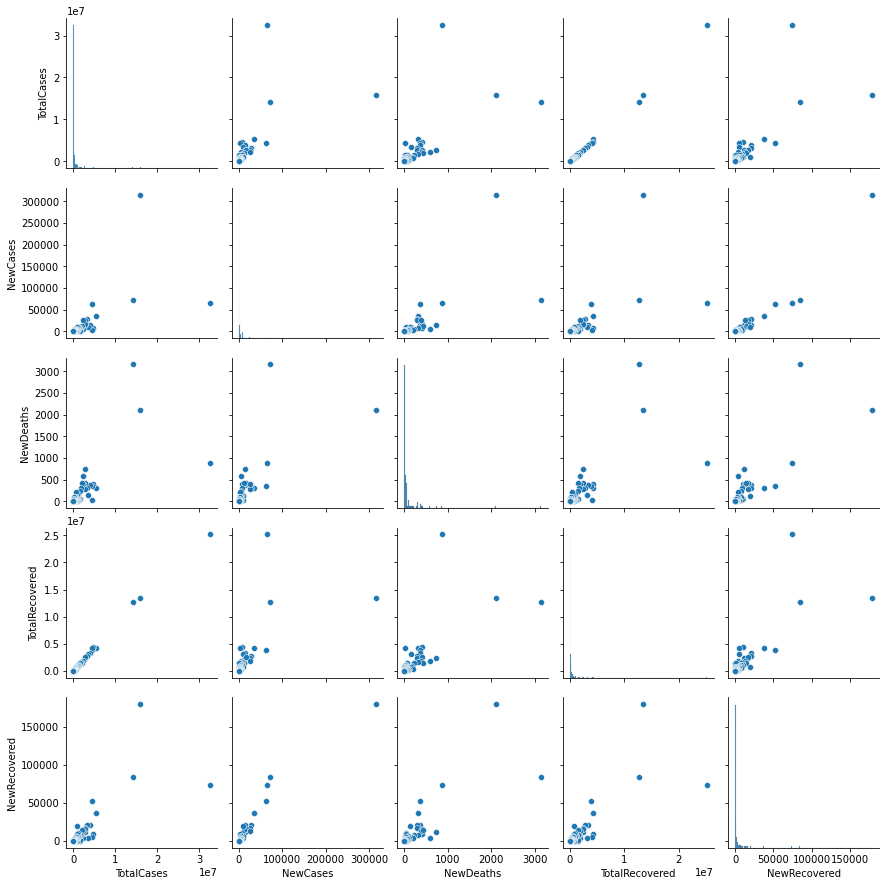

In [5]:
sns.pairplot(cs_df[selected_cols])

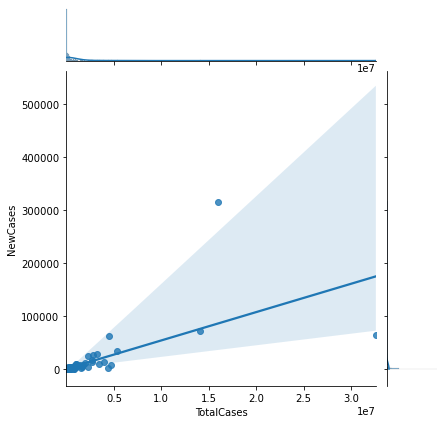

In [6]:
sns.jointplot(x = 'TotalCases', y ='NewCases', data = cs_df, kind ='reg' )

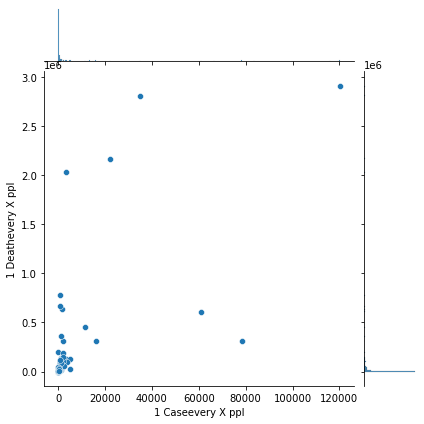

In [7]:
sns.jointplot(x = '1 Caseevery X ppl', y ='1 Deathevery X ppl', data = cs_df, kind ='scatter' )

<AxesSubplot:xlabel='Tot Cases/1M pop', ylabel='Deaths/1M pop'>

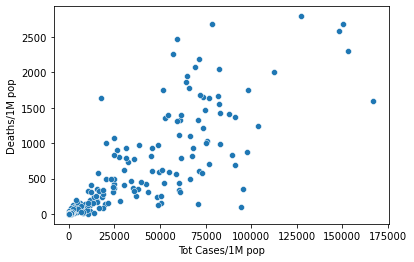

In [8]:
sns.scatterplot(x = 'Tot Cases/1M pop', y = 'Deaths/1M pop', data = cs_df)

<AxesSubplot:xlabel='Tot Cases/1M pop', ylabel='Tests/1M pop'>

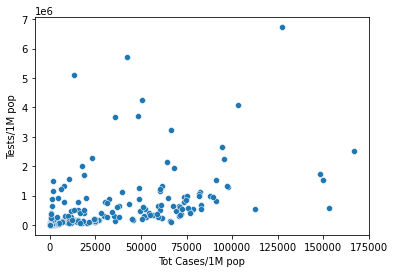

In [9]:
sns.scatterplot(x = 'Tot Cases/1M pop', y = 'Tests/1M pop', data = cs_df)

<AxesSubplot:xlabel='Deaths/1M pop', ylabel='Tests/1M pop'>

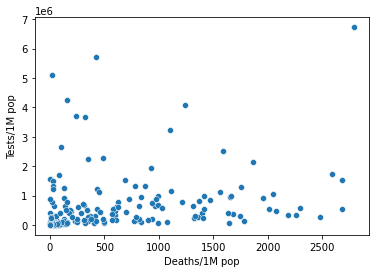

In [10]:
sns.scatterplot(x = 'Deaths/1M pop', y = 'Tests/1M pop', data = cs_df)